In [87]:
import numpy as np
import nltk 
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
news_csv = pd.read_csv("news_reuters_10.csv", error_bad_lines=False, header = None, names = ["stock", "company", "date", "title", "summary", "type", "website"])
google_price_csv = pd.read_csv("GOOG_2006-01-01_to_2017-11-01.csv")

In [69]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [73]:
number_to_month = {"01": "Jan", "02":"Feb", "03":"Mar", "04":"Apr", "05":"May", "06": "Jun", "07":"Jul", "08":"Aug", "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
def conv_num_to_string(d):
    year = d[0:4]
    month = d[4:6]
    day = d[6:8]
    new = day + "-" + number_to_month[month] + "-" + year[2:4]
    return new 

In [154]:
def sentiment_to_price_plot(stock, day_lag, pos_or_neg): #ex: sentiment_to_price_plot("AAPL", 1, 'neg')
    stock_data = news_csv[news_csv["stock"] == stock]
    stock_price_csv = pd.read_csv(stock+"_2006-01-01_to_2017-11-01.csv")
    temp_x = []
    temp_y = []
    for index, row in stock_data.iterrows():
        ss = sid.polarity_scores(row["summary"])
        score = ss[pos_or_neg]

        day = conv_num_to_string(str(row["date"]) )

        if day in stock_price_csv["Date"].values:

            temp_x.append(score)

            row_index = stock_price_csv.index[stock_price_csv["Date"] == day].tolist()[0]
            next_price = stock_price_csv.iloc[row_index - day_lag  ]
            #print next_price["Date"], google_price_csv.iloc[row_index]["Date"]
            diff = next_price["Close"] - next_price["Open"]
            temp_y.append(diff)

    plt.plot(temp_x, temp_y, "o")
    plt.ylabel("Closing Minus Opening after" + str(day_lag) + "Days")
    plt.xlabel(pos_or_neg + "NLTK Vader-Sentiment Score of Current Day's Summary")
    plt.title(stock + ",  " + str(day_lag) + " Day Lag,  " + pos_or_neg)
    plt.show()
    

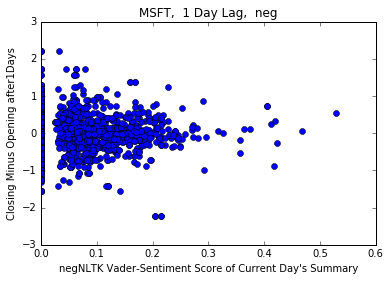

In [159]:
sentiment_to_price_plot("MSFT", 1, 'neg')

In [162]:
msft_data = news_csv[news_csv["stock"] == "MSFT"]
for index, row in msft_data.iterrows():
    ss = sid.polarity_scores(row["summary"])
   
    print ss, row["summary"]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} * Indexes: Dow -0.15 pct  S&P 500 -0.09 pct  Nasdaq +0.03 pct (Updates to mid-afternoon)
{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.5859} To access the newsletter  click on the link:    http://share.thomsonreuters.com/assets/newsletters/Indiamorning/MNC_IN_11102017.pdf           If you would like to receive this newsletter via email  please register at: https://forms.thomsonreuters.com/india-morning/               FACTORS TO WATCH     08:30 am: Aurobindo Pharma post-earnings analyst conference call in Mumbai.     09:15 am: Mahindra Logistics lists on stock exchanges in Mumbai.     10:00 am: Prime Minister Economic Advisory Council
{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.1027} An inventor-owned patent licensing entity sued Microsoft on Tuesday  saying the Redmond  Washington-based company's flagship smartphone infringes on patents relating to light-emitting diode (LED) technology.
{'neg': 0.0, 'neu': 1.0, '